In [1]:
def case_1(a, b, c):
    ac = c - a
    return ac.dot(ac)

def case_2(a, b, c):
    bc = c - b
    return bc.dot(bc)

def case_3(a, b, c):
    ab = b - a
    ac = c - a
    bc = c - b
    e = ac.dot(ab)
    f = ab.dot(ab)
    return ac.dot(ac) - e * e / f


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = np.array([-1.0, 0.0])
b = np.array([1.0, 0.0])

In [4]:
def eval_case(case_, minv, maxv):
    x = np.linspace(minv*10.0,maxv*10.0)/10.0
    y = np.linspace(-10, 10)/10.0
    X, Y = np.meshgrid(x,y)
    xi = X.flatten()
    yi = Y.flatten()
    ci = np.array([xi,yi]).T
    
    z_case_ = np.array([case_(a,b,c) for c in ci])
    z_case_ = np.reshape(z_case_, newshape=X.shape)
    return z_case_, X, Y


In [5]:
z_case_1, X1, Y1 = eval_case(case_1, -2, -0.8)
z_case_2, X2, Y2 = eval_case(case_2, 0.8, 2)
z_case_3, X3, Y3 = eval_case(case_3,  -2, 2)

In [6]:
import plotly.graph_objs as go
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)


In [7]:
c1 = np.ones_like(z_case_1) * -2 
c2 = np.ones_like(z_case_1) * 2 
c3 = np.ones_like(z_case_1)
fig = go.Figure(data=[
    go.Surface(z=z_case_1, x=X1, y=Y1),
    go.Surface(z=z_case_2, x=X2, y=Y2),
    go.Surface(z=z_case_3, x=X3, y=Y3),

])
fig.show()

In [8]:
go.Surface??

In [9]:
xi = np.array(range(-10,10))/10.0 * 2.0
ci = np.array([[i,10] for i in xi])

In [10]:
z_case_1 = np.array([case_1(a,b,c) for c in ci])

z_case_2 = np.array([case_2(a,b,c) for c in ci])

z_case_3 = np.array([case_3(a,b,c) for c in ci])


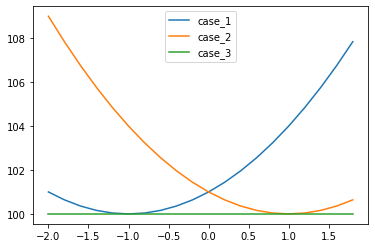

In [11]:
plt.plot(xi, z_case_1, label="case_1")
plt.plot(xi, z_case_2, label="case_2")
plt.plot(xi, z_case_3, label="case_3")
plt.legend()
plt.show()


In [12]:
from sympy import *
init_printing()
ai = symbols("a_x:y")
bi = symbols("b_x:y")
ci = symbols("c_x:y")
a = Matrix(ai)
b = Matrix(bi)
c = Matrix(ci)
dxi = Symbol("dx")
dx = Matrix([dxi, 0])

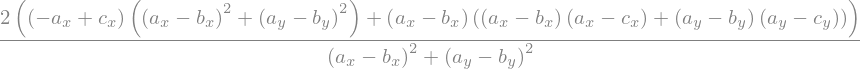

In [13]:
op1 = case_3(a,b,c)
simplify(diff(op1, ci[0]))

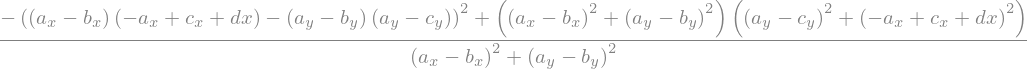

In [14]:
op2 = case_3(a,b, c + dx)
simplify(op2)

In [15]:
subs = dict()
subs[ai[0]], subs[ai[1]] = -10, 0
subs[bi[0]], subs[bi[1]] = 10, 0
subs[ci[0]], subs[ci[1]] = 5, 0.5
subs[dxi] = 1e-8

In [16]:
(op1 - op2).subs(subs) / 1e-8